In [ ]:
import pandas as pd
import pandas as pd 
import numpy as np
import string
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/all_data.csv" , lineterminator='\n')

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ه", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
def nospecial(text):
	import re
	text = re.sub("[a-zA-Z0-9]+", "",text)
	return text

In [ ]:
def preprocess_text(tweet): 

    #remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    
  
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    tweet = re.sub(p_tashkeel,"", tweet)

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #remove non arabic words
    tweet = nospecial(tweet)

    #trim    
    tweet = tweet.strip()

    #   #text stemming
    # from nltk.stem.isri import ISRIStemmer
    # st = ISRIStemmer()
    # ISRIStemmer().suf32(tweet)
    
    return tweet

In [ ]:
df.tweets = df.tweets.map(preprocess_text)
df.head()

,id,tweets,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [ ]:
df.head()

,id,tweets,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [ ]:
## Load the data to get started
import pandas as pd
import numpy as np
import tensorflow as tf
import spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import keras

In [ ]:
max_fatures = 100000
tokenizer = Tokenizer(num_words = max_fatures , split=' ')
tokenizer.fit_on_texts(df['tweets'].values)
X = tokenizer.texts_to_sequences(df['tweets'].values)
X = pad_sequences(X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
y = pd.get_dummies(df['dialect']).values

In [ ]:
embed_dim = 128
gru_out = 196

In [ ]:
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [ ]:
embed_dim = 128
gru_out = 196
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(GRU(gru_out, dropout=0.2, recurrent_dropout=0.2))


model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(32 , activation='relu'))
model.add(Dense(18,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 87, 128)           12800000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 87, 128)          0         
 ropout1D)                                                       
                                                                 
 gru (GRU)                   (None, 196)               191688    
                                                                 
 dense (Dense)               (None, 64)                12608     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [ ]:
Y = pd.get_dummies(df['dialect']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.02, random_state = 42 , shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(449033, 87) (449033, 18)
(9164, 87) (9164, 18)


In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs = 10 , validation_split = 0.02 , callbacks=[checkpoint_cb, early_stopping_cb], batch_size = 128)

Epoch 1/10
3438/3438 [==============================] - 3722s 1s/step - loss: 1.9669 - accuracy: 0.3711 - val_loss: 1.6609 - val_accuracy: 0.4662
Epoch 2/10
3438/3438 [==============================] - 3747s 1s/step - loss: 1.5324 - accuracy: 0.5180 - val_loss: 1.5338 - val_accuracy: 0.5198
Epoch 3/10
3438/3438 [==============================] - 3710s 1s/step - loss: 1.3273 - accuracy: 0.5861 - val_loss: 1.5227 - val_accuracy: 0.5315
Epoch 4/10
3438/3438 [==============================] - 3759s 1s/step - loss: 1.1814 - accuracy: 0.6332 - val_loss: 1.5574 - val_accuracy: 0.5321
Epoch 5/10
3438/3438 [==============================] - 3750s 1s/step - loss: 1.0728 - accuracy: 0.6676 - val_loss: 1.6107 - val_accuracy: 0.5315
Epoch 6/10
3438/3438 [==============================] - 3735s 1s/step - loss: 0.9846 - accuracy: 0.6951 - val_loss: 1.6735 - val_accuracy: 0.5309


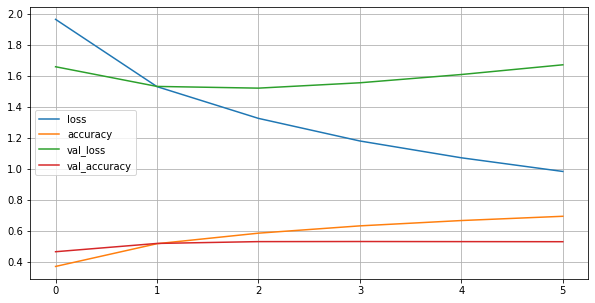

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = model.predict(X_test) 

In [ ]:
classes_x = np.argmax(Y_pred,axis=1)

In [ ]:
classes_x

array([13,  6,  8, ...,  0,  3, 13])

In [ ]:
Y_pred

array([[1.0143884e-05, 3.3124052e-05, 1.1118524e-05, ..., 1.6894215e-05,
        1.6968928e-05, 2.5370270e-03],
       [4.4781640e-02, 1.0780443e-01, 2.4531593e-03, ..., 1.0600042e-02,
        9.0138009e-04, 1.7853193e-02],
       [6.9264382e-02, 4.7746167e-02, 4.8035651e-02, ..., 1.0993466e-02,
        3.8097896e-02, 7.7932872e-02],
       ...,
       [6.9344139e-01, 2.3265608e-02, 3.8714455e-03, ..., 1.1081690e-03,
        4.1388106e-03, 1.2744113e-02],
       [1.6001050e-03, 4.1656705e-05, 2.1384783e-04, ..., 1.9695277e-05,
        4.1141719e-04, 9.6101656e-05],
       [1.5384685e-02, 9.2064768e-02, 1.0783656e-02, ..., 2.2789920e-02,
        7.8841746e-03, 8.2502320e-02]], dtype=float32)

In [ ]:
Y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
import numpy as np
Y_test_labels=np.argmax(Y_test, axis=1)
Y_test_labels[1]

6

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(classes_x , Y_test_labels )
cm

array([[232,  49,   4,   8,   6,   8,  42,   4,   7,   2,  38,  17,  59,
         24,   4,   7,   1,   9],
       [ 32, 159,   2,   3,   6,  13,  60,   5,   7,   3,  20,   9,  49,
         25,   5,   1,   1,   6],
       [  9,   4, 163,   5,   6,   6,   9,   7,  22,  29,   6,   4,   3,
          8,   7,   5,  20,   4],
       [ 20,  12,  20, 952,   7,  27,   9,  12,  38,  17,   7,  77,  12,
         10,  36,   8,  20,   7],
       [ 13,  19,   2,   4, 181,  13,  26,   9,   5,   3,   8,  17,  16,
         10,   5,  10,   1,   8],
       [ 16,  20,  10,   5,  12, 206,  14,  27,   9,   2,  16, 128,   9,
         14,   2,  26,   2,   5],
       [ 49,  93,   8,  14,  26,  29, 433,   8,  17,   3,  39,  14,  84,
         68,   4,  12,   3,  12],
       [  5,   9,   6,   6,   4,  31,   4, 386,   8,   1,   4,  42,   5,
          1,   6,  75,   5,   4],
       [ 23,  16,  23,  31,  10,  23,  21,  12, 492,   4,  18,  21,  11,
         21,  14,  10,  12,  17],
       [  1,   1,  16,   4,   0,   1,

In [ ]:
print(classification_report(Y_test_labels, classes_x))

              precision    recall  f1-score   support

           0       0.45      0.42      0.43       556
           1       0.39      0.30      0.34       538
           2       0.51      0.51      0.51       320
           3       0.74      0.83      0.78      1144
           4       0.52      0.58      0.55       311
           5       0.39      0.38      0.39       546
           6       0.47      0.55      0.51       791
           7       0.64      0.65      0.64       598
           8       0.63      0.68      0.65       725
           9       0.76      0.58      0.66       229
          10       0.39      0.37      0.38       393
          11       0.46      0.53      0.49       890
          12       0.55      0.43      0.48       632
          13       0.35      0.49      0.41       517
          14       0.69      0.53      0.60       286
          15       0.45      0.33      0.38       324
          16       0.61      0.49      0.54       183
          17       0.39    

In [ ]:
import pickle
  # download tokenizer
with open('tokenizer.pickle', 'wb')as handle:
  pickle. dump(tokenizer, handle, protocol=pickle. HIGHEST_PROTOCOL)                        


In [ ]:
  # loading.
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle. load(handle)

In [ ]:

label_encodding = {
    0:"AE" , 
    1:"BH" ,
    2:"DZ",
    3:"EG",
    4:"IQ",
    5:"JO",
    6:"KW",
    7:"LB",
    8:"LY",
    9:"MA",
    10:"OM",
    11:"PL",
    12:"QA",
    13:"SA",
    14:"SD",
    15:"SY",
    16:"TN",
    17:"YE"}

In [ ]:
while True :
  pass